# Market Basket Analysis and Community Detection of Michael Brown Combined Episodes - Petitions 1-25

In [1]:
petition_ids = list(range(1, 25))

## Market Basket

To start, we get a set of market basket data in which each row is a unique signer, and in each row is all the petitions they've signed.

Petition ID's (GET THIS FROM WILL)


Querying the database

library(RMySQL)

con = dbConnect(MySQL(), dbname = "wtp", user = user,
    password = password)

query = paste0("select * from wtp_data_signatures where petition_id in ('",
    paste(petitions, collapse = "', '"), "')")
signatures = dbGetQuery(con, query)

dbDisconnect(con)

USE: We end up with a file that just has the strings of petitions that each user signed. 

In [2]:
# put the transaction data in pro_gc.transactions - the following command prints the 2nd column only which is just the strings of petitions that each user signed
!awk '{ print $2; }' data/combined.basket > data/combined.transactions.basket

### Frequent Itemsets

In [ ]:
from fp_growth import find_frequent_itemsets
import csv

def get_frequent_itemsets(support=1):
    with open("data/combined.transactions.basket", "r") as transactions:
        return list(find_frequent_itemsets(csv.reader(transactions), support, True))

def frequent_itemsets(support=1, outfile=None):
    if outfile is not None:
        outfile = open(outfile, "wb")
        writer = csv.writer(outfile, delimiter=",")
    
    with open("data/combined.transactions.basket", "r") as transactions:
        frequent_itemsets = find_frequent_itemsets(csv.reader(transactions), support, True)
    
        for itemset, support in frequent_itemsets:
            if outfile is not None:
                writer.writerow([support] + sorted(itemset))
            else:
                print "%d\t%s" % (support, " ".join(sorted(itemset)))
                
# show frequent itemsets:
frequent_itemsets(1)

frequent_itemsets(1, "data/combined.freq.basket")

# write frequent itemsets with support >= 500 to a file
frequent_itemsets(500, "data/combined.freq.500.basket")

# write frequent itemsets with support >= 1000 to a file
frequent_itemsets(1000, "data/combined.freq.1000.basket")

329	24
4	24 25
2	24 25 3
2	16 24 25
1	16 24 25 3
39	20 24
2	20 24 25
1	20 24 25 3
2	16 20 24 25
1	16 20 24 25 3
20	14 20 24
2	14 20 24 25
1	14 20 24 25 3
2	14 16 20 24 25
1	14 16 20 24 25 3
5	14 20 24 3
16	14 16 20 24
5	14 16 20 24 3
25	16 20 24
6	16 20 24 3
18	18 20 24
4	18 20 24 3
13	14 18 20 24
2	14 18 20 24 25
1	14 18 20 24 25 3
2	14 16 18 20 24 25
1	14 16 18 20 24 25 3
4	14 18 20 24 3
10	14 16 18 20 24
4	14 16 18 20 24 3
2	18 20 24 25
1	18 20 24 25 3
2	16 18 20 24 25
1	16 18 20 24 25 3
13	16 18 20 24
4	16 18 20 24 3
9	20 24 3
2	22 24
1	18 22 24
1	14 18 22 24
1	14 16 18 22 24
1	16 18 22 24
2	20 22 24
1	18 20 22 24
1	14 18 20 22 24
1	14 16 18 20 22 24
1	16 18 20 22 24
2	14 20 22 24
2	14 16 20 22 24
2	16 20 22 24
2	14 22 24
2	14 16 22 24
2	16 22 24
34	23 24
1	23 24 25
1	23 24 25 3
1	16 23 24 25
1	16 23 24 25 3
14	13 23 24
1	13 23 24 25
1	13 23 24 25 3
1	13 16 23 24 25
1	13 16 23 24 25 3
2	12 13 23 24
1	12 13 20 23 24
1	12 13 18 20 23 24
1	12 13 18 20 23 24 3
1	12 13 14 18 20 23 24
1	

#### Breakdown of frequent itemsets, by length

In [4]:
from collections import defaultdict, Counter

itemsets = get_frequent_itemsets(1)
occurrences = defaultdict(int)

for (items, frequency) in itemsets:
    occurrences[len(items)] += frequency

for length, num in sorted(Counter(occurrences).items(), key=lambda x: x[0]):
    print "%3d\t%8d" % (length, num)

  1	  343429
  2	   81424
  3	   30864
  4	   20318
  5	   25436
  6	   36244
  7	   46211
  8	   49692
  9	   44112
 10	   31908
 11	   18577
 12	    8569
 13	    3060
 14	     816
 15	     153
 16	      18
 17	       1


### Association Rules

In [5]:
import Orange, csv

def fmt_rule(rule): 
    return "%8.3f %10.2f    %4s" % (rule.support, rule.confidence, rule)

data = Orange.data.Table("data/combined.transactions.basket")

rules = Orange.associate.AssociationRulesSparseInducer(data, support=.001)

print "%8s %10s %s" % ("Support", "Confidence", "   Rule")

# sort by support, then confidence, then number of rules
rules = sorted(rules, key=lambda x: (x.confidence, x.support, str(x).count(' ')), reverse=True)

for r in rules:
    print fmt_rule(r)
    
with open("data/combined.association_rules.csv", "wb") as outfile:
    writer = csv.writer(outfile, delimiter=",")
    
    writer.writerow(["Support", "Confidence", "Rule"])
    
    for rule in rules:
        writer.writerow(["%.3f" % rule.support, "%.3f" % rule.confidence, rule])

 Support Confidence    Rule
   0.003       0.71    14 20 18 -> 16
   0.003       0.71    14 18 3 -> 16
   0.002       0.70    14 20 3 -> 16
   0.009       0.64    14 18 -> 16
   0.002       0.64    20 18 3 -> 16
   0.008       0.62    14 20 -> 16
   0.011       0.58    14 3 -> 16
   0.005       0.57    20 18 -> 16
   0.003       0.55    16 20 18 -> 14
   0.006       0.49    20 3 -> 16
   0.057       0.48    14 -> 16
   0.001       0.47    25 14 -> 16
   0.001       0.45    20 18 3 -> 14
   0.006       0.45    18 3 -> 16
   0.002       0.44    16 20 3 -> 14
   0.004       0.44    20 18 -> 14
   0.008       0.43    16 20 -> 14
   0.001       0.42    8 -> 3
   0.003       0.41    16 18 3 -> 14
   0.002       0.40    12 -> 3
   0.019       0.40    20 -> 16
   0.009       0.39    16 18 -> 14
   0.001       0.36    14 20 3 -> 18
   0.001       0.36    14 18 3 -> 20
   0.002       0.35    5 -> 3
   0.002       0.35    16 20 18 -> 3
   0.003       0.34    14 16 20 -> 18
   0.024       0.33    

Printing association rules by their length

In [6]:
rules = sorted(rules, key=lambda x: str(x).count(' '))

with open("data/combined.association_rules.length.csv", "wb") as outfile:
    writer = csv.writer(outfile)
    
    writer.writerow(["length", "confidence", "support", "rule"])
    
    for rule in rules:
        writer.writerow([len(str(rule).split())-1, "%.2f" % rule.confidence, "%.2f" % rule.support, rule])

Edge lists by confidence

In [7]:
confidence = .1

rules_with_min_conf = [r for r in rules if str(r).count(' ') == 2 and r.confidence >= confidence]

with open("data/combined.edgelist.10.confidence.csv", "wb") as outfile:
    writer = csv.writer(outfile)
    
    for rule in rules_with_min_conf:
        writer.writerow([s.strip() for s in str(rule).split("->")])

In [8]:
import csv

MIN_CONF = .1

rules_with_min_conf = [ (int(str(r).strip().split('->')[0]), int(str(r).strip().split('->')[1])) for r in rules if str(r).count(' ') == 2 and r.confidence >= MIN_CONF ]

with open("data/adjacency_matrix_%s_percent_confidence.csv" % str(int(MIN_CONF * 100)), "w") as outfile:
    writer = csv.writer(outfile, delimiter=',', quotechar='"')
    
    cur_row = []
    writer.writerow([""] + petition_ids)
    
    for petition_y in petition_ids:
        cur_row = [ petition_y ] 
                
        for petition_x in petition_ids:
            cur_row.append(1 if (petition_y, petition_x) in rules_with_min_conf else 0)
            
        writer.writerow(cur_row)

#### Analyzing a petition, by signatures over time

## Community Detection

The following cell is just a wrapper written for running the community detection, the code can be ignored.

In [1]:
"""
This is a wrapper for the ModularityOptimizer.jar file, since
code books are getting increasingly frustrating as time goes on.
It attempts to abstract any mapping the ModOptimizer needs so the ids
you get back from this script are the ids you put in.

Takes an infile of rep ids as an edge list, such as:
rep_id1<tab>rep_id2<tab>....ignored details such as weights

Maps the data in a way that the modularity optimizer can understand,
runs the jar file for it
...
"""
import sys, os
from fabric.api import local
from fabric.context_managers import hide

MOD_OPTIMIZER_JAR = 'data/ModularityOptimizer.jar'
MOD_OPTIMIZER_CMD = 'java -jar ' + MOD_OPTIMIZER_JAR + ' %s %s 1 1.0 1 10 10 0 0'

MOD_OPTIMIZER_INFILE = 'mo_in.tmp'
MOD_OPTIMIZER_OUTFILE = 'mo_out.tmp'

def community_detection(infile):
    # returns a list of tuples of (rep_id, community_id)
    communities = []
    
    rep_id_to_mo_id = {}
    rep_ids = set()
    i = 0

    # delete any files from prior usage
    try:
        os.remove(MOD_OPTIMIZER_INFILE)
        os.remove(MOD_OPTIMIZER_OUTFILE)
    except OSError:
        pass

    # create mapping of rep id -> mo id
    with open(infile, "r") as infile:
        for line in infile:
            n1 = int(line.split('\t')[0])
            n2 = int(line.split('\t')[1])

            rep_ids.add(n1)
            rep_ids.add(n2)

        for rep_id in rep_ids:
            rep_id_to_mo_id[rep_id] = i
            i += 1

        # create the infile for MO from the mapping of the original infile
        with open(MOD_OPTIMIZER_INFILE, "w") as outfile:
            # rewind infile
            infile.seek(0)

            for line in infile:
                n1 = int(line.split('\t')[0])
                n2 = int(line.split('\t')[1]) 

                outfile.write("%d\t%d\n" % (rep_id_to_mo_id[n1], rep_id_to_mo_id[n2]))

    # run the mod optimizer and put the contents into the outfile
    with hide("running"):
        local(MOD_OPTIMIZER_CMD % (MOD_OPTIMIZER_INFILE, MOD_OPTIMIZER_OUTFILE))

    # transcribe the outfile back to using rep_ids instead of mo_ids
    with open(MOD_OPTIMIZER_OUTFILE, "r") as outfile:
        i = 0

        for community_id in outfile:
            found_rep_id = -1
            # rep_id is from the mo_id - which is actually the number line we're on
            # rep_id<tab>community_id
            for rep_id, mo_id in rep_id_to_mo_id.iteritems():
                if mo_id == i:
                    found_rep_id = rep_id
                    break

            if found_rep_id == -1:
                raise Exception("rep_id not found for mo_id %d." % mo_id)

            communities.append((found_rep_id, int(community_id)))
            i += 1
            
    return communities

### Finding Communities

Run the community detection and put the contents into an output file, keep tracking of how many are in each community and print the summary.

In [7]:
community_ids = []
signers_communities = community_detection("data/combined.g06.nx")

with open("data/combined.communities.g06.csv", "w") as outfile:
    import csv
    writer = csv.writer(outfile)
    
    for (rep_id, community_id) in signers_communities:
        writer.writerow([rep_id, community_id])
        community_ids.append(community_id)

In [9]:
from collections import Counter

for cid, count in Counter(community_ids).most_common():
    print cid, count

0 198
1 136
2 104
3 103


We can refer back to the very first file referenced in the notebook pro_gc.basket which contains the signer id follows by all the petitions they've signed.

Then, for each of the petitions, calculate the number of people per community who signed that petition.

In [10]:
from collections import defaultdict

rep_id_signed_petitions = defaultdict(list)

with open("data/combined.basket", "r") as infile:
    for line in infile:
        rep_id, pids = line.split()
        
        rep_id_signed_petitions[int(rep_id)] = map(int, pids.split(","))

### Determining how much each community contributes to each petition

In [11]:
community_contributions = []
unique_community_ids = sorted(list(set(community_ids)))

for pid in petition_ids:
    contributions = [] 
    
    for cid in unique_community_ids:
        # find the rep ids that exist for a particular community
        community_rep_ids = [ rep_id for (rep_id, comm) in signers_communities if comm == cid ]
        
        # get how many people signed this petition, and are in this community
        contributions.append(len([ 1 for rep_id, pids in rep_id_signed_petitions.iteritems() if pid in pids and rep_id in community_rep_ids ]))
        
    community_contributions.append([pid] + contributions)
    print pid, contributions, sum(contributions)
    

with open("data/community_contributions.g06.csv", "wb") as outfile:
    writer = csv.writer(outfile)
        
    writer.writerow(["petition_id"] + [ "c%d" % x for x in unique_community_ids ])
        
    for contribution in community_contributions:
        writer.writerow(contribution)
            
# Sanity Checks:
# c0, c1, and c2 shouldn't exceed the numbers fron the counter cell
# No sum should ever exceed the total number of nodes in the graph (2213 in this case)

NameError: name 'petition_ids' is not defined

To do further analysis, we can look at the breakdown of communities at a state level.

We need a mapping of these ids (called rep_ids) to our actual signature_ids, as well as some helper functions to determine zipcodes.

This requires pyzipcode.

### Geographical Analyses of Communities

In [15]:
import re
from pyzipcode import ZipCodeDatabase

rep_sig_map = {}
zcdb = ZipCodeDatabase()

with open("etc/identities.txt", "r") as infile:
    reader = csv.reader(infile, delimiter=',', quotechar='"')

    for row in reader:
        rep_sig_map[int(row[0])] = row[1]
        
def zipcode_from_sig_id(sig_id):
    if len(str(sig_id)) >= 5 and re.findall("\d{5}", sig_id):
        return re.findall("\d{5}", sig_id)[0]
    else:
        return False

def zipcode_exists(zipcode):
    try:
        zcdb[zipcode]
        return True
    except IndexError:
        return False

In [16]:
def state_breakdown_of_community(cid):
    table = defaultdict(int)
    invalid_zipcodes = 0
    
    community_zipcodes = map(lambda rep_id: zipcode_from_sig_id(rep_sig_map[rep_id]), [ rep_id for (rep_id, comm) in signers_communities if comm == cid ])
    
    for zipcode in community_zipcodes:
        try:
            table[zcdb[zipcode].state] += 1
        except IndexError:
            invalid_zipcodes += 1
            
    print "%d/%d (%.5f) of CID %d zipcodes were invalid." % (invalid_zipcodes, len(community_zipcodes), float(invalid_zipcodes)/len(community_zipcodes), cid)
    
    return Counter(table)

with open("etc/communities.g07.states.csv", "wb") as outfile:
    writer = csv.writer(outfile, delimiter=',', quotechar='"')
    
    for cid in unique_community_ids:
        writer.writerow([cid])
        
        for l in state_breakdown_of_community(cid).most_common(): # most common with no arg is like .items() but sorted
            writer.writerow(l)  
            
        writer.writerow([])

268/974 (0.27515) of CID 0 zipcodes were invalid.
34/753 (0.04515) of CID 1 zipcodes were invalid.
29/486 (0.05967) of CID 2 zipcodes were invalid.


### Determining the distribution of nodes against communities

Here, etc/pro_gc_400_influential_nodes.txt represents 400 nodes that made it to the top of our lists in terms of centrality measures (performed outside the notebook).

In [28]:
with open("etc/pro_gc_400_influential_nodes.txt", "r") as infile:
    node_ids = [ int(l.strip()) for l in infile ]
    
for cid in unique_community_ids:
    # find the rep ids that exist for this community
    community_rep_ids = [ rep_id for (rep_id, comm) in signers_communities if comm == cid ]
        
    # the length of the intersection of node_ids and community_rep_ids is how many people from
    # cid are in node_ids.
    print cid, len(set(community_rep_ids).intersection(set(node_ids)))

0 196
1 131
2 73


## Plotting signatures over time

In [39]:
import pandas as pd
from matplotlib import pyplot as plt

def plot_graph(filename):
    df = pd.read_csv(filename)
    df['created'] = pd.to_datetime(df['created'], unit="s")
    df['created'].groupby(df['created'].apply(lambda x: x.date())).count()
    
    plt.figure(figsize=(18.0, 8.0))
    df['created'].groupby(df['created'].apply(lambda x: x.date())).count().plot()

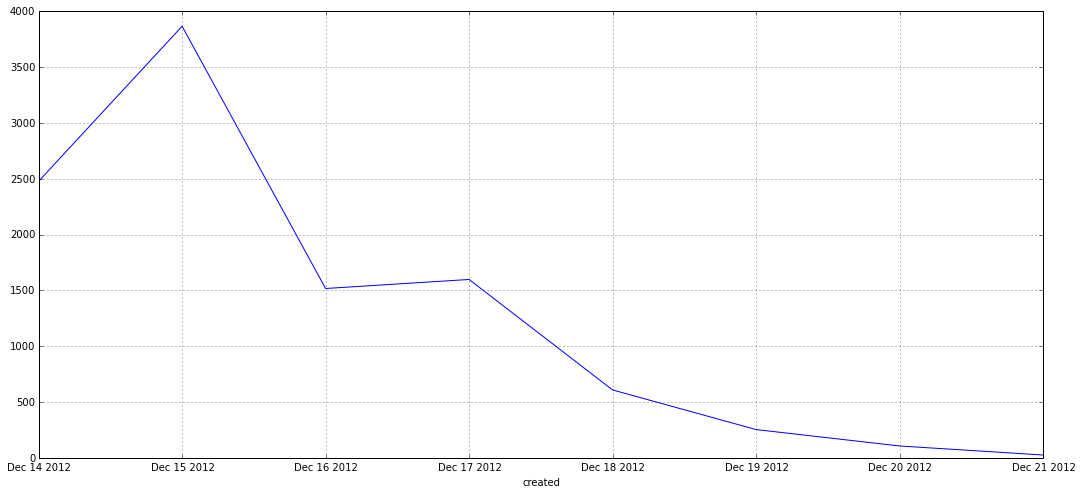

In [40]:
plot_graph("etc/970.txt")

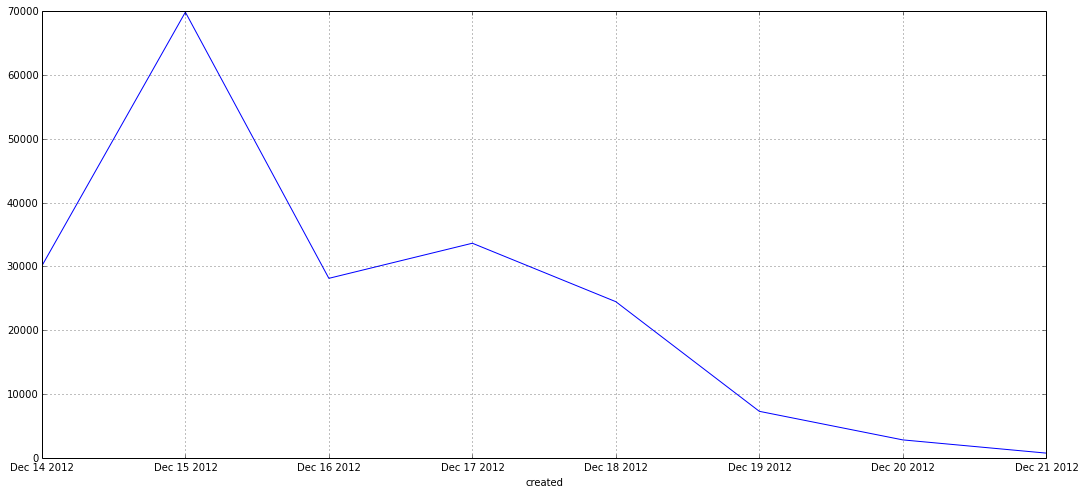

In [41]:
plot_graph("etc/971.txt")

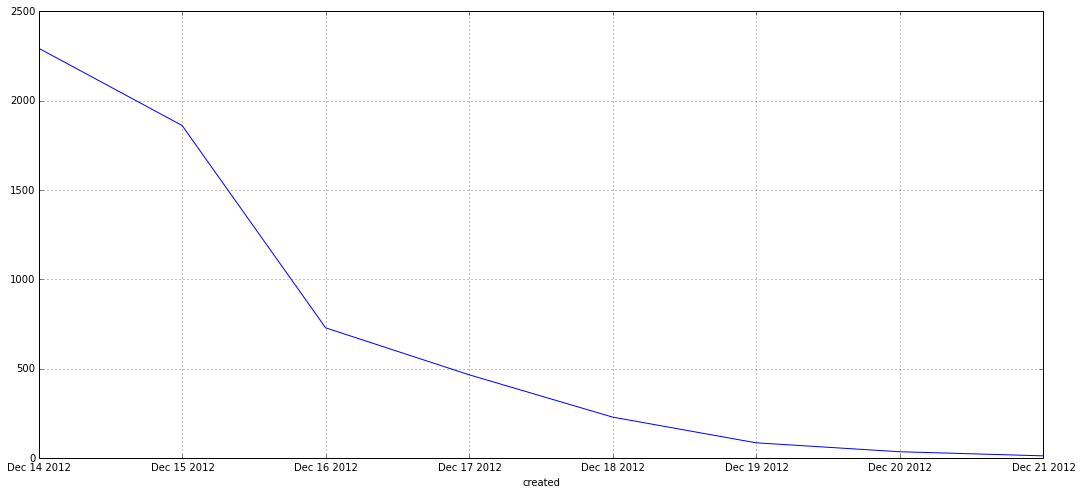

In [42]:
plot_graph("etc/972.txt")

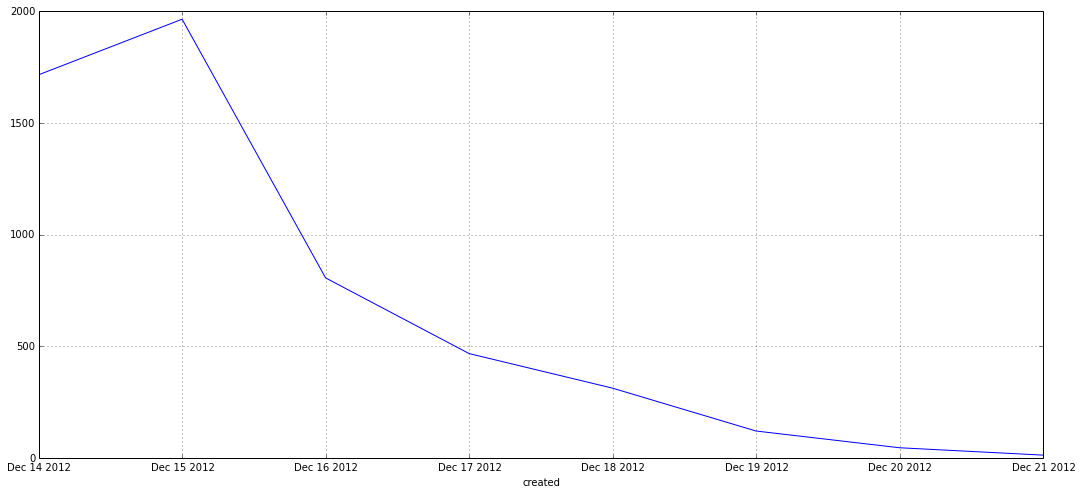

In [43]:
plot_graph("etc/976.txt")

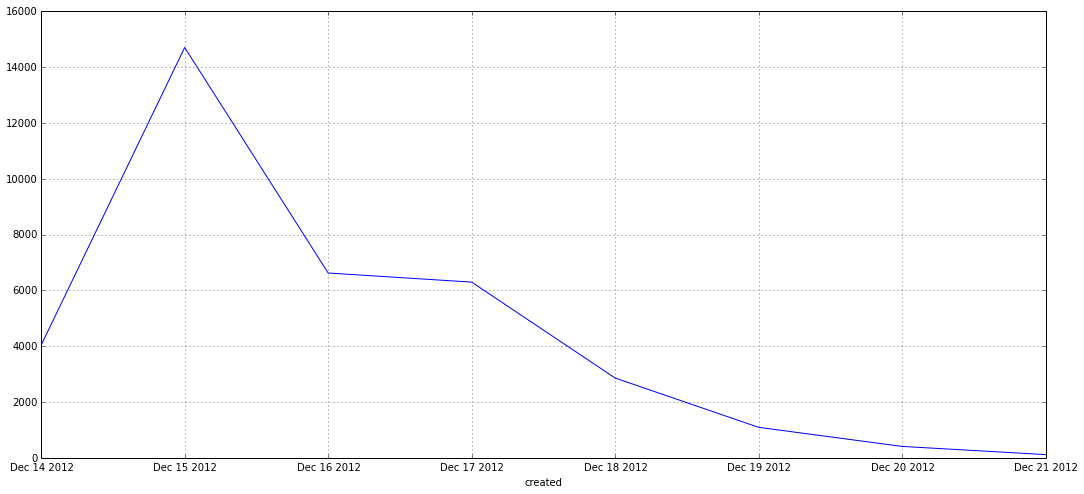

In [44]:
plot_graph("etc/978.txt")